# JM0250 Data Visualization 
### Academic year 2022-2023

## FIFA World Cup 2022 Data Exploration
Data sources:

- FIFA World Cup 2022 Player Data (https://www.kaggle.com/datasets/swaptr/fifa-world-cup-2022-player-data)
- FIFA World Cup 2022 Match Data (https://www.kaggle.com/datasets/swaptr/fifa-world-cup-2022-match-data)
- FIFA World Cup 2022 Team Data (https://www.kaggle.com/datasets/swaptr/fifa-world-cup-2022-statistics)
- FIFA World Cup 2022 Twitter Dataset (https://www.kaggle.com/datasets/kumari2000/fifa-world-cup-twitter-dataset-2022)
- FIFA World Cup 2022 Prediction (https://www.kaggle.com/datasets/shilongzhuang/soccer-world-cup-challenge)
- FIFA World Cup 2022 Player Images (https://www.kaggle.com/datasets/soumendraprasad/fifa-2022-all-players-image-dataset)
- FIFA World Cup Historic (https://www.kaggle.com/datasets/piterfm/fifa-football-world-cup)
- FIFA World Cup Penalty Shootouts (https://www.kaggle.com/datasets/pablollanderos33/world-cup-penalty-shootouts, https://www.kaggle.com/datasets/jandimovski/world-cup-penalty-shootouts-2022)

Data dictionaries and additional info can be found in the respective data folders.

In [9]:
# Import libraries
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os

# Do not truncate tables
pd.set_option('display.max_columns', None)

In [86]:
# Load the data

# Match data
df_match_data = pd.read_csv('../Data/FIFA World Cup 2022 Match Data/data.csv', delimiter=',')

# Player data
df_player_defense       = pd.read_csv('../Data/FIFA World Cup 2022 Player Data/player_defense.csv', delimiter=',')
df_player_gca           = pd.read_csv('../Data/FIFA World Cup 2022 Player Data/player_gca.csv', delimiter=',')
df_player_keepers       = pd.read_csv('../Data/FIFA World Cup 2022 Player Data/player_keepers.csv', delimiter=',')
df_player_keepersadv    = pd.read_csv('../Data/FIFA World Cup 2022 Player Data/player_keepersadv.csv', delimiter=',')
df_player_misc          = pd.read_csv('../Data/FIFA World Cup 2022 Player Data/player_misc.csv', delimiter=',')
df_player_passing       = pd.read_csv('../Data/FIFA World Cup 2022 Player Data/player_passing.csv', delimiter=',')
df_player_passing_types = pd.read_csv('../Data/FIFA World Cup 2022 Player Data/player_passing_types.csv', delimiter=',')
df_player_playingtime   = pd.read_csv('../Data/FIFA World Cup 2022 Player Data/player_playingtime.csv', delimiter=',')
df_player_possession    = pd.read_csv('../Data/FIFA World Cup 2022 Player Data/player_possession.csv', delimiter=',')
df_player_shooting      = pd.read_csv('../Data/FIFA World Cup 2022 Player Data/player_shooting.csv', delimiter=',')
df_player_stats         = pd.read_csv('../Data/FIFA World Cup 2022 Player Data/player_stats.csv', delimiter=',')

# Team data
df_team_data        = pd.read_csv('../Data/FIFA World Cup 2022 Team Data/team_data.csv', delimiter=',')
df_team_group_stats = pd.read_csv('../Data/FIFA World Cup 2022 Team Data/group_stats.csv', delimiter=',')

# Historic data
df_historic_fifa_ranking      = pd.read_csv('../Data/FIFA World Cup Historic/fifa_ranking_2022-10-06.csv', delimiter=',')
df_historic_matches_1930_2022 = pd.read_csv('../Data/FIFA World Cup Historic/matches_1930_2022.csv', delimiter=',')
df_historic_world_cup         = pd.read_csv('../Data/FIFA World Cup Historic/world_cup.csv', delimiter=',')

# Penalty shootouts
df_penalty_shootouts = pd.read_csv('../Data/FIFA World Cup Penalty Shootouts/WorldCupShootouts.csv', delimiter=',')

# Twitter data
df_tweets_01 = pd.read_csv('../Data/FIFA World Cup 2022 Twitter Dataset/tweets1.csv', delimiter=';')
df_tweets_02 = pd.read_csv('../Data/FIFA World Cup 2022 Twitter Dataset/tweets2.csv', delimiter=';')
df_tweets = pd.concat([df_tweets_01, df_tweets_02])

# Prediction data
df_prediction_groups  = pd.read_csv('../Data/FIFA World Cup 2022 Prediction/2022_world_cup_groups.csv', delimiter=',')
df_prediction_matches = pd.read_csv('../Data/FIFA World Cup 2022 Prediction/2022_world_cup_matches.csv', delimiter=',')
df_prediction_international_matches = pd.read_csv('../Data/FIFA World Cup 2022 Prediction/international_matches.csv', delimiter=',')
df_prediction_world_cup_matches = pd.read_csv('../Data/FIFA World Cup 2022 Prediction/world_cup_matches.csv', delimiter=',')
df_prediction_world_cups = pd.read_csv('../Data/FIFA World Cup 2022 Prediction/world_cups.csv', delimiter=',')

# Player images
def list_full_paths(directory):
    return [os.path.join(directory, file) for file in os.listdir(directory)]

def img_reshape(img):
    img = Image.open(img).convert('RGB')
    img = img.resize((300,300))
    img = np.asarray(img)
    return img

def showImages(group, land, player):
    images  = list_full_paths('../Data/FIFA World Cup 2022 Player Images/Images/Images/Group ' + group + '/' + land + ' Players/Images_' + player)
    img_arr = []
    
    for image in images:
        img_arr.append(img_reshape(image))
        
    rows = 2
    cols = 2
    img_count = 0
    fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=((2,2)))
                             
    for i in range(rows):
        for j in range(cols):
            if img_count < len(img_arr):
                axes[i,j].imshow(img_arr[img_count])
                axes[i,j].axis('off')
                img_count+=1
                
    plt.subplots_adjust(wspace=0, hspace=0)
    

In [218]:
topscorers = df_player_stats.sort_values('goals', ascending=False).head(5)
pens_made = df_player_shooting.sort_values('pens_made', ascending=False).head(5)
topassists = df_player_stats.sort_values('assists', ascending=False).head(5)

most_passes = df_player_passing.sort_values('passes_completed', ascending=False).head(5)
most_minutes = df_player_stats.sort_values('minutes', ascending=False).head(5)
most_saves = df_player_keepers.sort_values('gk_saves', ascending=False).head(5)

most_clean_sheets = df_player_keepers.sort_values('gk_clean_sheets', ascending=False).head(5)
most_tackles = df_player_defense.sort_values('tackles', ascending=False).head(5)
most_blocks = df_player_defense.sort_values('blocks', ascending=False).head(5)


In [221]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=3, cols=3, subplot_titles=('Topscorers', 'Pens made', "Most assists", 'Most passes', 'Most minutes', 'Most saves', 'Most clean sheets',
                                                    'Most tackles', 'Most blocks'))
fig.add_trace(row=1, col=1,
    trace=go.Bar(x=topscorers['player'], y=topscorers['goals'])
    )
fig.add_trace(row=1, col=2,
    trace=go.Bar(x=pens_made['player'], y=pens_made['pens_made'])
    )
fig.add_trace(row=1, col=3,
    trace=go.Bar(x=topassists['player'], y=topassists['assists'])
    )

fig.add_trace(row=2, col=1,
    trace=go.Bar(x=most_passes['player'], y=most_passes['passes_completed'])
    )
fig.add_trace(row=2, col=2,
    trace=go.Bar(x=most_minutes['player'], y=most_minutes['minutes'])
    )
fig.add_trace(row=2, col=3,
    trace=go.Bar(x=most_saves['player'], y=most_saves['gk_saves'])
    )

fig.add_trace(row=3, col=1,
    trace=go.Bar(x=most_clean_sheets['player'], y=most_clean_sheets['gk_clean_sheets'])
    )
fig.add_trace(row=3, col=2,
    trace=go.Bar(x=most_tackles['player'], y=most_tackles['tackles'])
    )
fig.add_trace(row=3, col=3,
    trace=go.Bar(x=most_blocks['player'], y=most_blocks['blocks'])
    )
fig.update_yaxes(title_text="Goals", row=1, col=1, position=0.5)
fig.update_yaxes(title_text="Assists", row=1, col=2)
fig.show()

In [131]:
## Explore Match data
df_match_data_cleaned = df_match_data[['match', 'match_time', 'home_team', 'away_team', 'score', 'attendance', 'venue', 'referee', 'home_formation', 'away_formation']]
df_match_data_cleaned

match           match_time      home_team     away_team        score   
0       1  2022-11-20 19:00:00          Qatar       Ecuador          0–2  \
1       2  2022-11-21 16:00:00        England       IR Iran          6–2   
2       3  2022-11-21 19:00:00        Senegal   Netherlands          0–2   
3       4  2022-11-21 22:00:00  United States         Wales          1–1   
4       5  2022-11-22 13:00:00      Argentina  Saudi Arabia          1–2   
..    ...                  ...            ...           ...          ...   
59     60  2022-12-10 22:00:00        England        France          1–2   
60     61  2022-12-13 22:00:00      Argentina       Croatia          3–0   
61     62  2022-12-14 22:00:00         France       Morocco          2–0   
62     63  2022-12-17 18:00:00        Croatia       Morocco          2–1   
63     64  2022-12-18 18:00:00      Argentina        France  (4) 3–3 (2)   

    attendance                          venue                        referee   
0        67372                Al Bayt Stadium                 Daniele Orsato  \
1        45334  Khalifa International Stadium                  Raphael Claus   
2        41721             Al Thumama Stadium                 Wilton Sampaio   
3        43418          Ahmed bin Ali Stadium  Abdulrahman Ibrahim Al Jassim   
4        88012          Lusail Iconic Stadium                  Slavko Vinčič   
..         ...                            ...                            ...   
59       68895                Al Bayt Stadium                 Wilton Sampaio   
60       88966          Lusail Iconic Stadium                 Daniele Orsato   
61       68294                Al Bayt Stadium             César Arturo Ramos   
62       44137  Khalifa International Stadium  Abdulrahman Ibrahim Al Jassim   
63       88966          Lusail Iconic Stadium               Szymon Marciniak   

   home_formation away_formation  
0           5-3-2          4-4-2  
1         4-2-3-1          5-4-1  
2         4-2-3-1        3-4-1-2  
3           4-3-3          3-5-2  
4           4-4-2        4-1-4-1  
..            ...            ...  
59          4-3-3        4-2-3-1  
60          4-4-2          4-3-3  
61        4-2-3-1          5-4-1  
62        4-2-3-1          4-3-3  
63          4-3-3        4-2-3-1  

[64 rows x 10 columns]

In [152]:
df_match_data_cleaned = df_match_data[['match', 'match_time', 'home_team', 'away_team', 'score', 'attendance', 'venue', 'referee', 'home_formation', 'away_formation']]
df_match_data_cleaned.loc[:48, 'Stage'] = 'Group stage'
df_match_data_cleaned.loc[48:56, 'Stage'] = 'Round of 8'
df_match_data_cleaned.loc[56:60, 'Stage'] = 'Quarter finals'
df_match_data_cleaned.loc[60:62, 'Stage'] = 'Semi finals'
df_match_data_cleaned.loc[62:, 'Stage'] = 'Finals'
df_match_data_cleaned.iloc[62]

match                                        63
match_time                  2022-12-17 18:00:00
home_team                               Croatia
away_team                               Morocco
score                                       2–1
attendance                                44137
venue             Khalifa International Stadium
referee           Abdulrahman Ibrahim Al Jassim
home_formation                          4-2-3-1
away_formation                            4-3-3
Stage                                    Finals
Name: 62, dtype: object

In [140]:
df_group_fase = df_match_data_cleaned[:48]
df_round_of_8 = df_match_data_cleaned[48:56]
df_quarter_finals = df_match_data_cleaned[56:60]
df_semi_finals = df_match_data_cleaned[60:62]
df_finals = df_match_data_cleaned[-2:]
df_group_fase

match           match_time       home_team       away_team score   
0       1  2022-11-20 19:00:00           Qatar         Ecuador   0–2  \
1       2  2022-11-21 16:00:00         England         IR Iran   6–2   
2       3  2022-11-21 19:00:00         Senegal     Netherlands   0–2   
3       4  2022-11-21 22:00:00   United States           Wales   1–1   
4       5  2022-11-22 13:00:00       Argentina    Saudi Arabia   1–2   
5       6  2022-11-22 16:00:00         Denmark         Tunisia   0–0   
6       7  2022-11-22 19:00:00          Mexico          Poland   0–0   
7       8  2022-11-22 22:00:00          France       Australia   4–1   
8       9  2022-11-23 13:00:00         Morocco         Croatia   0–0   
9      10  2022-11-23 16:00:00         Germany           Japan   1–2   
10     11  2022-11-23 19:00:00           Spain      Costa Rica   7–0   
11     12  2022-11-23 22:00:00         Belgium          Canada   1–0   
12     13  2022-11-24 13:00:00     Switzerland        Cameroon   1–0   
13     14  2022-11-24 16:00:00         Uruguay  Korea Republic   0–0   
14     15  2022-11-24 19:00:00        Portugal           Ghana   3–2   
15     16  2022-11-24 22:00:00          Brazil          Serbia   2–0   
16     17  2022-11-25 13:00:00           Wales         IR Iran   0–2   
17     18  2022-11-25 16:00:00           Qatar         Senegal   1–3   
18     19  2022-11-25 19:00:00     Netherlands         Ecuador   1–1   
19     20  2022-11-25 22:00:00         England   United States   0–0   
20     21  2022-11-26 13:00:00         Tunisia       Australia   0–1   
21     22  2022-11-26 16:00:00          Poland    Saudi Arabia   2–0   
22     23  2022-11-26 19:00:00          France         Denmark   2–1   
23     24  2022-11-26 22:00:00       Argentina          Mexico   2–0   
24     25  2022-11-27 13:00:00           Japan      Costa Rica   0–1   
25     26  2022-11-27 16:00:00         Belgium         Morocco   0–2   
26     27  2022-11-27 19:00:00         Croatia          Canada   4–1   
27     28  2022-11-27 22:00:00           Spain         Germany   1–1   
28     29  2022-11-28 13:00:00        Cameroon          Serbia   3–3   
29     30  2022-11-28 16:00:00  Korea Republic           Ghana   2–3   
30     31  2022-11-28 19:00:00          Brazil     Switzerland   1–0   
31     32  2022-11-28 22:00:00        Portugal         Uruguay   2–0   
32     33  2022-11-29 18:00:00         Ecuador         Senegal   1–2   
33     34  2022-11-29 18:00:00     Netherlands           Qatar   2–0   
34     35  2022-11-29 22:00:00           Wales         England   0–3   
35     36  2022-11-29 22:00:00         IR Iran   United States   0–1   
36     37  2022-11-30 18:00:00       Australia         Denmark   1–0   
37     38  2022-11-30 18:00:00         Tunisia          France   1–0   
38     39  2022-11-30 22:00:00    Saudi Arabia          Mexico   1–2   
39     40  2022-11-30 22:00:00          Poland       Argentina   0–2   
40     41  2022-12-01 18:00:00          Canada         Morocco   1–2   
41     42  2022-12-01 18:00:00         Croatia         Belgium   0–0   
42     43  2022-12-01 22:00:00           Japan           Spain   2–1   
43     44  2022-12-01 22:00:00      Costa Rica         Germany   2–4   
44     45  2022-12-02 18:00:00           Ghana         Uruguay   0–2   
45     46  2022-12-02 18:00:00  Korea Republic        Portugal   2–1   
46     47  2022-12-02 22:00:00          Serbia     Switzerland   2–3   
47     48  2022-12-02 22:00:00        Cameroon          Brazil   1–0   

    attendance                          venue                        referee   
0        67372                Al Bayt Stadium                 Daniele Orsato  \
1        45334  Khalifa International Stadium                  Raphael Claus   
2        41721             Al Thumama Stadium                 Wilton Sampaio   
3        43418          Ahmed bin Ali Stadium  Abdulrahman Ibrahim Al Jassim   
4        88012          Lusail Iconic Stadium                  Slavko Vinči

In [11]:
df_match_data.describe()

match    home_xg    away_xg    attendance  home_possession   
count  64.000000  64.000000  64.000000     64.000000        64.000000  \
mean   32.500000   1.379687   1.270312  53191.437500        50.890625   
std    18.618987   0.889655   0.953636  17108.666048        12.744270   
min     1.000000   0.100000   0.000000  39089.000000        18.000000   
25%    16.750000   0.700000   0.600000  42424.000000        41.750000   
50%    32.500000   1.250000   1.100000  44093.000000        53.000000   
75%    48.250000   1.825000   1.700000  66851.500000        59.250000   
max    64.000000   4.000000   5.700000  88966.000000        81.000000   

       away_possession  home_completed_passes  home_attempted_pases   
count        64.000000              64.000000             64.000000  \
mean         49.109375             444.843750            545.765625   
std          12.744270             156.147084            156.710403   
min          19.000000             165.000000            245.000000   
25%          40.750000             332.750000            424.500000   
50%          47.000000             446.500000            552.500000   
75%          58.250000             532.250000            630.750000   
max          82.000000            1009.000000           1093.000000   

       away_completed_passes  away_attempted_pases   home_sot   away_sot   
count              64.000000             64.000000  64.000000  64.000000  \
mean              427.515625            529.265625   4.062500   3.437500   
std               165.301071            169.349572   2.455153   2.617857   
min               162.000000            248.000000   0.000000   0.000000   
25%               322.500000            417.500000   2.750000   2.000000   
50%               396.500000            494.000000   4.000000   3.000000   
75%               509.500000            612.500000   6.000000   5.000000   
max               995.000000           1106.000000  10.000000  11.000000   

       home_total_shots  away_total_shots  home_saves  away_saves  home_fouls   
count         64.000000         64.000000   64.000000   64.000000   64.000000  \
mean          11.125000         11.265625    2.468750    2.640625   12.625000   
std            4.952152          5.853346    2.189214    1.938476    5.244801   
min            2.000000          0.000000    0.000000    0.000000    3.000000   
25%            8.000000          7.000000    1.000000    1.000000    9.000000   
50%           10.000000         10.500000    2.000000    2.000000   13.000000   
75%           14.000000         13.000000    3.250000    4.000000   15.000000   
max           25.000000         32.000000   10.000000    8.000000   30.000000   

       away_fouls  home_corners  away_corners  home_crosses  away_crosses   
count   64.000000     64.000000     64.000000     64.000000     64.000000  \
mean    12.343750      4.484375      4.437500     16.640625     17.375000   
std      3.788951      2.777416      2.782456      8.241142      6.936217   
min      5.000000      0.000000      0.000000      2.000000      4.000000   
25%     10.000000      2.000000      2.000000     11.000000     13.000000   
50%     12.000000      4.500000      4.000000     16.500000     16.000000   
75%     14.250000      6.000000      6.000000     22.000000     21.250000   
max     24.000000     12.000000     14.000000     46.000000     35.000000   

       home_touches  away_touches  home_tackles  away_tackles   
count     64.000000     64.000000     64.000000     64.000000  \
mean     651.109375    633.062500     16.484375     15.843750   
std      151.298099    165.782117      4.649602      5.909956   
min      356.000000    341.000000      8.000000      5.000000   
25%      526.750000    530.000000     13.000000     12.000000   
50%      652.500000    604.000000     16.000000     14.500000   
75%      735.750000    702.750000     20.250000     19.000000   
max     1179.000000   1190.000000     28.000000     37.000000   

       home_interc

In [153]:
# Remove penalty data from score
df_match_data['score'] = df_match_data['score'].str.replace(r"\(.\)","")
           
# Split match score               
df_match_data[['score_home', 'score_away']] = df_match_data.score.str.split("–", expand=True,)
# df_match_data['score_home'] = df_match_data['score_home'].str.replace(" ","").astype('int')
# df_match_data['score_away'] = df_match_data['score_away'].str.replace(" ","").astype('int')

fig = px.scatter(df_match_data, x="home_possession", y="score_home",
                 color="venue", size="attendance",
                 width=1000, height=800)
fig.show()

In [106]:
pip install dash_design_kit

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\niekv\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [104]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
# import cv2
import os

def list_full_paths(directory):
    return [os.path.join(directory, file) for file in os.listdir(directory)]

def img_reshape(img):
    img = Image.open(img).convert('RGB')
    img = img.resize((300,300))
    img = np.asarray(img)
    return img


def showImages(group, land, player):
    images_path = '../Data/FIFA World Cup 2022 Player Images/Images/Images/Group ' + group + '/' + land + ' Players/Images_' + player
    images = list_full_paths(images_path)
    img_arr = []

    for image in images:
        img_arr.append(img_reshape(image))

    rows = 1
    cols = 1
    img_count = 0

    # Create subplot with specified number of rows and columns
    fig = make_subplots(rows=rows, cols=cols)

    for i in range(1, rows + 1):
        for j in range(1, cols + 1):
            if img_count < len(img_arr):
                # Add image trace to the subplot
                fig.add_trace(
                    go.Image(z=img_arr[img_count], opacity=1),
                    row=i, col=j
                )
                img_count += 1

    # Update layout to remove axis labels and adjust spacing
    fig.update_layout(
        showlegend=False,
        width=800,  # Adjust the width as needed
        height=800,  # Adjust the height as needed
        margin=dict(l=0, r=0, t=0, b=0),
    )

    # Show the plot
    fig.show()

In [105]:
showImages('A', 'Netherlands', 'Matthijs de Ligt')

In [95]:
groups = ["A", "B", "C", "D", "E", "F", "G", "H"]
group_number = df_team_group_stats[df_team_group_stats['team'] ==team]['group'].iloc[0]
group = groups[group_number-1]
group

'B'

In [119]:
df_team_data[['team', 'games']]

team  games
0        Argentina      7
1        Australia      4
2          Belgium      3
3           Brazil      5
4         Cameroon      3
5           Canada      3
6       Costa Rica      3
7          Croatia      7
8          Denmark      3
9          Ecuador      3
10         England      5
11          France      7
12         Germany      3
13           Ghana      3
14            Iran      3
15           Japan      4
16  Korea Republic      4
17          Mexico      3
18         Morocco      7
19     Netherlands      5
20          Poland      4
21        Portugal      5
22           Qatar      3
23    Saudi Arabia      3
24         Senegal      4
25          Serbia      3
26           Spain      4
27     Switzerland      4
28         Tunisia      3
29   United States      4
30         Uruguay      3
31           Wales      3

In [122]:
df_players_team[['player', 'position', 'games', 'goals', 'assists']]

player position  games  goals  assists
109             Bukayo Saka       FW      4      3        0
110           Callum Wilson       FW      2      0        1
159             Declan Rice       MF      5      0        0
189               Eric Dier       DF      2      0        0
240              Harry Kane       FW      5      2        3
241           Harry Maguire       DF      5      0        1
275           Jack Grealish       FW      5      1        0
303             John Stones       DF      5      0        0
308        Jordan Henderson       MF      4      1        0
310         Jordan Pickford       GK      5      0        0
328         Jude Bellingham       MF      5      1        1
337         Kalvin Phillips       MF      2      0        1
359         Kieran Trippier       DF      3      0        0
376             Kyle Walker       DF      3      0        0
400               Luke Shaw       DF      5      0        1
409         Marcus Rashford       FW      5      3        0
422             Mason Mount       MF      4      0        0
521              Phil Foden       FW      4      1        2
528         Raheem Sterling       FW      3      1        1
628  Trent Alexander-Arnold       DF      1      0        0

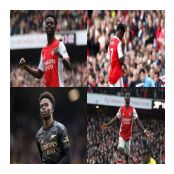

In [88]:
team = "England"
df_players_team = df_player_stats[df_player_stats["team"]==team]
player = df_players_team.sort_values(by=["goals"],ascending=False)['player'].iloc[0]
showImages('B', team, player)

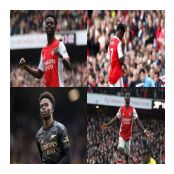

In [89]:
def update_graph(value):

    team = value
    df_players_team = df_player_stats[df_player_stats["team"]==team]
    player = df_players_team.sort_values(by=["goals"],ascending=False)['player'].iloc[0]
    fig = showImages('B', team, player)

    return fig

update_graph('England')

In [127]:
# filtered_data = df_player_stats[df_player_stats["team"] == 'Argentina'][['player', 'position', 'games', 'goals', 'assists']]
# filtered_data
def update_graph(value):

    filtered_data = df_player_stats[df_player_stats["team"] == value][['player', 'position', 'games', 'goals', 'assists']]
    fig = make_subplots(rows=1, cols=2, subplot_titles=('Topscorers', "Most assists"))
    fig.add_trace(row=1, col=1,
        trace=go.Bar(x=filtered_data['player'], y=filtered_data['goals'])
        )
    fig.add_trace(row=1, col=2,
        trace=go.Bar(x=filtered_data['player'], y=filtered_data['assists'])
        )
    fig.update_yaxes(title_text="Goals", row=1, col=1)
    fig.update_yaxes(title_text="Assists", row=1, col=2)


    return fig

update_graph('Argentina')

In [154]:
df_match_data = pd.read_csv('../Data/FIFA World Cup 2022 Match Data/data.csv', delimiter=',')
df_match_data_cleaned = df_match_data[['match', 'match_time', 'home_team', 'away_team', 'score', 'attendance', 'venue', 'referee', 'home_formation', 'away_formation']]
df_match_data_cleaned[['score_home', 'score_away']] = df_match_data_cleaned.score.str.split("–", expand=True,)
df_match_data_cleaned.loc[:48, 'Stage'] = 'Group stage'
df_match_data_cleaned.loc[48:56, 'Stage'] = 'Round of 8'
df_match_data_cleaned.loc[56:60, 'Stage'] = 'Quarter finals'
df_match_data_cleaned.loc[60:62, 'Stage'] = 'Semi finals'
df_match_data_cleaned.loc[62:, 'Stage'] = 'Finals'
column = ['match_time', 'home_team', 'away_team', 'score_home', 'score_away', 'attendance', 'venue', 'referee', 'home_formation', 'away_formation']

C:\Users\niekv\AppData\Local\Temp\ipykernel_23792\1258696118.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\niekv\AppData\Local\Temp\ipykernel_23792\1258696118.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\niekv\AppData\Local\Temp\ipykernel_23792\1258696118.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [183]:
import re
filtered_data = df_match_data_cleaned[df_match_data_cleaned["Stage"] == 'Quarter finals'][column]
for index, row in filtered_data.iterrows():
    filtered_data.loc[index, 'score_home'] = int(re.sub("\(.*?\)","",str(filtered_data.loc[index, 'score_home'])))
    filtered_data.loc[index, 'score_away'] = int(re.sub("\(.*?\)","",str(filtered_data.loc[index, 'score_away'])))

filtered_data


match_time    home_team  away_team score_home score_away   
56  2022-12-09 18:00:00      Croatia     Brazil          1          1  \
57  2022-12-09 22:00:00  Netherlands  Argentina          2          2   
58  2022-12-10 18:00:00      Morocco   Portugal          1          0   
59  2022-12-10 22:00:00      England     France          1          2   

    attendance                   venue         referee home_formation   
56       43893  Education City Stadium  Michael Oliver          4-3-3  \
57       88235   Lusail Iconic Stadium   Antonio Matéu        3-4-1-2   
58       44198      Al Thumama Stadium   Facundo Tello          4-3-3   
59       68895         Al Bayt Stadium  Wilton Sampaio          4-3-3   

   away_formation  
56        4-2-3-1  
57          5-3-2  
58          4-3-3  
59        4-2-3-1

In [188]:
avg_home = filtered_data['score_home'].mean()
avg_away = filtered_data['score_away'].mean()
avg_away

1.25

In [196]:
def update_graph(value):

    filtered_data = df_match_data_cleaned[df_match_data_cleaned["Stage"] == value][column]
    for index, row in filtered_data.iterrows():
        filtered_data.loc[index, 'score_home'] = int(re.sub("\(.*?\)","",str(filtered_data.loc[index, 'score_home'])))
        filtered_data.loc[index, 'score_away'] = int(re.sub("\(.*?\)","",str(filtered_data.loc[index, 'score_away'])))
    avg_home = filtered_data['score_home'].mean()
    avg_away = filtered_data['score_away'].mean()
    fig = make_subplots(rows=1, cols=2, subplot_titles=('Average goals', "Average attendance"))
    fig.add_trace(row=1, col=1,
        trace=go.Bar(x=['Home', 'Away'], y=[avg_home, avg_away], width=0.42)
        )
    fig.add_trace(row=1, col=2,
        trace=go.Bar(x=filtered_data['venue'], y=filtered_data['attendance'], width=0.42)
        )
    fig.update_yaxes(title_text="Goals", row=1, col=1)
    fig.update_yaxes(title_text="Attendance", row=1, col=2)


    return fig

update_graph('Quarter finals')